# Fitting a line to GRB afterglow photometry

This exercise teaches you to fit the simplest model to data: a line, using different methods. 

Notes: 

  A GRB is a powerful cosmic stellar explosion. GRB stands for Gamma Ray Burst. While we see flux in Gamma Ray frequency (very high energy light which our eyes cannot see and does not go through the Earth's atmosphere) which characterize the explosion and gives it itsname, we also see visible light, generally called After Glow (AG)

  **In this exercise you will fit a line to the decreasing afterglow luminosity of a GRB**
    
  **TL;DR: we measure a quantity named magnitude over time, which relates to the brightness of the GRB, and which is expected to change it roughly linearly with the logarithm of time.**
    
  **Details**: *The light that we measure from these explosions changes over time, so we can study its time series. The change in light is exponential, not linear, but if we take the logarithm of the light, that chance may be linear, since the logarithm is the inverse of exponent. The logarithm of the light flux is called magnitude in astronomy. A line is a power law in log-log space. The GRB afterglow is generated by a powerlaw process.*
    

  *In reality, the correct model is a  broken powerlaw: the slope of the line "breaks" or changes, at some point in time. But this exercise is about fitting lines.*

# initial imports

In [1]:
import pandas as pd
import pylab as pl
%pylab inline

# I have created a stylesheet to define default plot behaviors. 
# This stylesheet changes the default parameters stored in the dictionary matplitlib.rcParams
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/main/fbb.mplstyle")
pl.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


# Task 1: Read and prepare the input dataset
I am reading the data with Pandas. Pandas has excellent utilities for input-output of tabular data and also for time variables. We will use it throughout as our main package to acquire and manipulate data

find the link to the *raw* input file on github in the HW1 folder https://github.com/fedhere/MLTSA_FBianco/tree/master/HW1

In [2]:
grbAG = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/main/HW1/grb050525A.csv')
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [3]:
grbAG.tail()

,filter,time,mag,magerr,upperlimit
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1
118,V,1171176,NaN,21.16,1


In [4]:
grbAG.describe()

,time,mag,magerr,upperlimit
count,1.190000e+02,108.000000,119.000000,119.000000
mean,2.767789e+04,15.750228,2.116471,0.092437
std,1.391231e+05,2.065191,6.069448,0.290867
min,6.600000e+01,12.860000,0.060000,0.000000
25%,2.085000e+02,14.075000,0.125000,0.000000
50%,6.240000e+02,15.593296,0.190000,0.000000
75%,6.372500e+03,16.296586,0.240000,0.000000
max,1.171176e+06,21.017147,22.090000,1.000000


## Create the log-time variable

We will fit a line in log space. The magnitude column I gave you is the logarithm (base 10) of the flus so that is already available. Create a logarithm base 10 of the time variable

(Fitting a line in log-log space corresponds to fitting a powerlaw y=x^a in natural space. Note: we mean logbase 10, use ```numpy.log10()```)

If you have trouble with this look at this gist https://gist.github.com/fedhere/42956d318347def627f6ad750c3eee9a


In [5]:
grbAG["logtime"] = np.log10(grbAG['time'])
grbAG.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098


## Visualize the data
The data are photometric measurements: measurement of flux from an exploding star. The flux is measured in different photometric bands, i.e. within different wavelength range. You can think about this as a filter that would limit the light collected by a camera to a single color, e.g. red, blue, or green. In most all cameras (your phone camera for example) collect data in RGB bands saparately and combine them to create a "color picture". Our eyes also perceive color in 3 bands, R, G, B. 

The information about the photometric band is stored in the variable ```grbAG.filter```. If I wanted to retrieve all magnitudes for filter 'V' I would do ```grbAG.loc[grbAG["filter"] == f, "mag"]```.

Plot the data with different colors for different photometric bands. 

Use pl.errorbar to display the uncertainties in the data - if you do not know how to use pl.errorbar you can symply type

```pl.errorbar?``` in a cell to retrieve the help

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


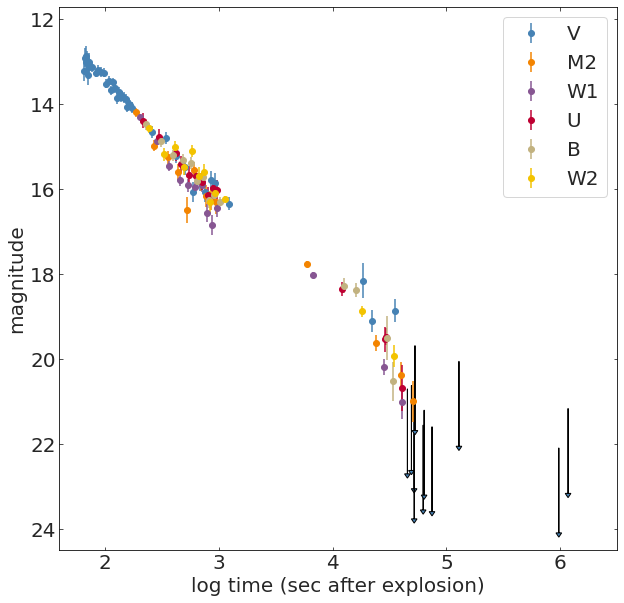

In [6]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    mags = grbAG.loc[grbAG["filter"] == f, "mag"]
    times = grbAG.loc[grbAG["filter"] == f, "logtime"]
    err = grbAG.loc[grbAG["filter"] == f, "magerr"]
    pl.errorbar(times, mags, yerr=err, fmt='o', label=f)

# plot the upperlimits as arrows 
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime, 
             grbAG.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24.5,11.7)          
pl.xlim(1.6, 6.5)

pl.legend()
#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time (sec after explosion)", fontsize=20);



Figure 1: Photometry of the Afterglow of GRB 052505A. All photometry is from the Swift satellite and it is obtained from Table 3 of Blustin et al. 2005 https://arxiv.org/pdf/astro-ph/0507515.pdf. The photometric band for each datapoint is indicated in the legend. Time is relative from the estimated moment of explosion of the stellar progenitor. Upperlimits are indicated by down-pointing arrows. 

## Clean the data: Remove upper limits
This data includes upper limits which I plotted as downward errors. upper and lower limits (technically called "censored data" are extremely hard to deal with in modeling). For now, lets just remove them. 

To remove the upper limits you can "broadcast" the data: in pandas that looks like 

```grbAG.loc[grbAG.upperlimit == 0]```

If you do not know how to remove selected rows from a dataframe based on a condition look at this gist https://gist.github.com/fedhere/e9cd67d9dc0357ee547e03a12ceb4719

The information about whether the point is an upper limit or a measurement is stored in the variable ```grbAG.upperlimit```. 


# Task 2: Fit models to data
## Task 2a: Solve using the Normal Equation

You can use the code I put in the slides for this - you can copy and paste it but you will learn most if you try type it down and make sure you understand it line by line!!

It can be shown that the best linear fit to data is given by the equation:  

$(X^T \cdot X)^{-1} \cdot X^T \cdot \vec{y}$

The solution is a tuple of 2 parameters: sloper and intercept. Therefore the input has to be Nx2


In [7]:
# I don't think I needed to make a new variable for this but just in case
grbAG_noupperlimits = grbAG[grbAG.upperlimit == 0]

In [8]:
x = grbAG_noupperlimits['logtime']
# adding comments where I want to make sure I understand what I'm doing...
#make a matrix of 1s and the logtime for X?
X = np.c_[np.ones((len(grbAG_noupperlimits) - grbAG_noupperlimits.upperlimit.sum(), 1)), grbAG_noupperlimits.logtime]
y = grbAG_noupperlimits.mag

print("shape of the input array X", X.shape)
print("shape of the input array y", y.shape)
#note the shape in python is flipped compared to the shape in linear algebra

shape of the input array X (108, 2)
shape of the input array y (108,)


In [9]:
# apparently "Compute the (multiplicative) inverse of a matrix"--transposing the product of X array
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print ("best fit parameters from the Normal Equation: " + 
       "intercept {:.2f}, slope {:.2f}".format(*theta_best))

best fit parameters from the Normal Equation: intercept 8.58, slope 2.51


## Task 2b: Fit a line to the data with sklearn LinearRegression

The exogenous (independent) variable is ```grbAG.logtime```.





In [10]:
#note: imports should be moved to the top cell - follow PEP8 guidelines
from sklearn.linear_model import LinearRegression

#sklearn is an object oriented package. You will call the function which will create a model (model selection) then fit it to the data separately (model fitting)
# it makese sense that these results are identical, right?

lr = LinearRegression()
X = np.c_[np.ones((len(grbAG_noupperlimits) - grbAG_noupperlimits.upperlimit.sum(), 1)), grbAG_noupperlimits.logtime]
y = grbAG_noupperlimits.mag
lr.fit(X, y)
lr.coef_, lr.intercept_
       
#this will create new properties of the model instance: the intercept and coefficients!

print ("best fit parameters from the sklearn LinearRegression(): " + 
       "intercept {:.2f}, slope {:.2f}".format(lr.intercept_, lr.coef_[1]))

best fit parameters from the sklearn LinearRegression(): intercept 8.58, slope 2.51


## Optional Task 2c: Fit a line to the data (excluding the upper limits) by minimizing an objective function

First, choose the L1 metric (see class notes) as the objective function.

Use ```scipy.optimize.minimize()``` to minimize it.


In [11]:
#same as L2 but not squared and add absolute value
#note: imports should be moved to the top cell - follow PEP8 guidelines
from scipy.optimize import minimize

def line(x, intercept, slope):
    return slope * x + intercept

def l1(args, x, y):
    a, b = args
    return (sum(np.absolute(y - line(a,b,x))))

x = grbAG_noupperlimits.logtime.values
y = grbAG_noupperlimits.mag.values
initialGuess = (10, 1) #this can be important, a bad choice can get us stuck in a local minimum. But for this simple problem we can just guess whaetever

l1(initialGuess, x, y)
l1Solution = minimize(l1, initialGuess, args=(x, y))
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " + 
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))

      fun: 26.303691795238304
 hess_inv: array([[ 2.97658370e-09, -6.23754906e-09],
       [-6.23754906e-09,  7.87224744e-04]])
      jac: array([0.07699132, 0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 228
      nit: 13
     njev: 72
   status: 2
  success: False
        x: array([2.64056448, 8.2261226 ])

best fit parameters from the minimization of L1: slope 2.64, intercept 8.23


"Precision loss" message here means: the numbers were so small couldn't tell if we got the actual minimum.


## Optional task 2d: Fit a line to the data (excluding the upper limits) by minimizing an objective function that accounts for the measurements uncertainties

Since the data has uncertainty, choose the Pearson's $\chi^2$ (chi squared) function as your objective function. The $\chi^2$ is the distance between prediction and truth, divided by the uncertainty (sigma squares) see slides or see slides or https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#:~:text=10%20References-,Definition,differs%20from%20a%20theoretical%20distribution.

In [12]:

def chi2(args, x, y, s):
    a, b = args
    return sum((y - line(x, b, a))**2 / s**2)

s = grbAG_noupperlimits.magerr.values
x = grbAG_noupperlimits.logtime.values
y = grbAG_noupperlimits.mag.values

initialGuess = (10, 1)


chi2Solution = minimize(chi2, initialGuess, args=(x, y, s))

print(chi2Solution)
print("")
print("best fit parameters from the minimization of the chi squared: " + 
       "slope {:.2f}, intercept {:.2f}".format(*chi2Solution.x))

      fun: 317.42066980131057
 hess_inv: array([[ 0.0002006 , -0.00053778],
       [-0.00053778,  0.00153936]])
      jac: array([3.81469727e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([2.48019101, 8.5994875 ])

best fit parameters from the minimization of the chi squared: slope 2.48, intercept 8.60


# Task 3: Plot all the solutions

To do this best, you can create a function that uses the parameters you input and plots a line. Add a legend that describes which line corresponds to what.

If you do not know how to define a function look here. https://gist.github.com/fedhere/babc8d20533acb9288caf097138825bc


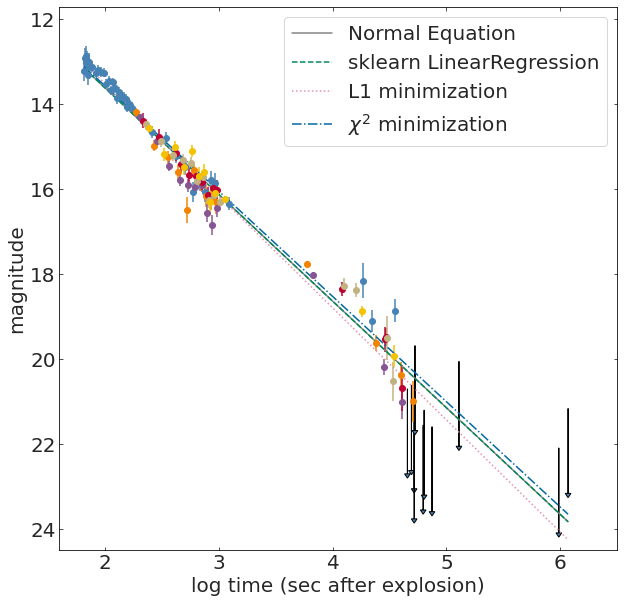

In [13]:
#I know the point of this is not just to replicate your plots but thought adding the line styling would be cute
def plotline(intercept, slope, plotname,style):
    y = grbAG['logtime']*slope + intercept
    ax.plot(grbAG['logtime'], y, label=plotname, linestyle = style)
    
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#plot the models
for f in grbAG["filter"].unique():
    mags = grbAG.loc[grbAG["filter"] == f, "mag"]
    times = grbAG.loc[grbAG["filter"] == f, "logtime"]
    err = grbAG.loc[grbAG["filter"] == f, "magerr"]
    pl.errorbar(times, mags, yerr=err, fmt='o')

# plot the upperlimits as arrows 
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime, 
             grbAG.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')


#normal equation
plotline(theta_best[0], theta_best[1], "Normal Equation", "-")
         
#sklearn
plotline(lr.intercept_, lr.coef_[1], "sklearn LinearRegression", "--")
         
#minimize L1
plotline(l1Solution.x[1], l1Solution.x[0], "L1 minimization",":")
         
#minimize chi2
#learned a cool trick for rendering greek characters in matplotlib for this, neat
plotline(chi2Solution.x[1], chi2Solution.x[0], "$\chi^{2}$ minimization","-.")

#pl.ylim(24,11.7)  
        
pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)          
pl.xlim(1.6, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time (sec after explosion)", fontsize=20);

Figure 2: Same as Figure 1, but with linear regression models plotted. The models correspond to the best fit line to the data (excluding upper limits) calculated analytically by solving the normal equation, by solving the fit analysitcally with sklearn.LinearRegression(), and by minimizing the objective functions L1 and Chi squared. The models are indicated in the legend.

#Split training and test set

In [ ]:
x = grbAG